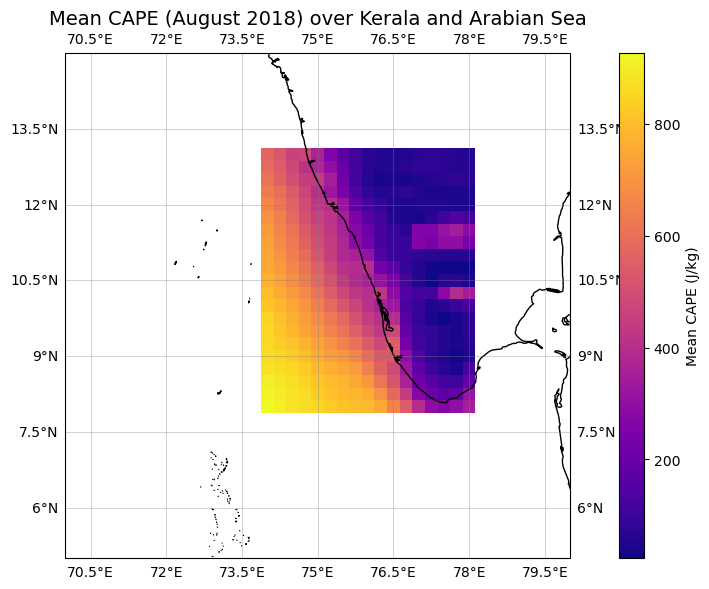

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_data_single_levels_CAPE.nc")

# Compute mean CAPE
cape_mean = ds['cape'].mean(dim='valid_time')

# Plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot CAPE with improved styling
cape_mean.plot(
    ax=ax,
    cmap='plasma',  # or 'inferno', or 'Spectral_r'
    cbar_kwargs={'label': 'Mean CAPE (J/kg)'}
)

# Add borders and coastlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Optional: add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

# Updated extent: covers Arabian Sea + Kerala + Western Ghats
ax.set_extent([70, 80, 5, 15], crs=ccrs.PlateCarree())

# Title
ax.set_title("Mean CAPE (August 2018) over Kerala and Arabian Sea", fontsize=14)

plt.tight_layout()
plt.show()


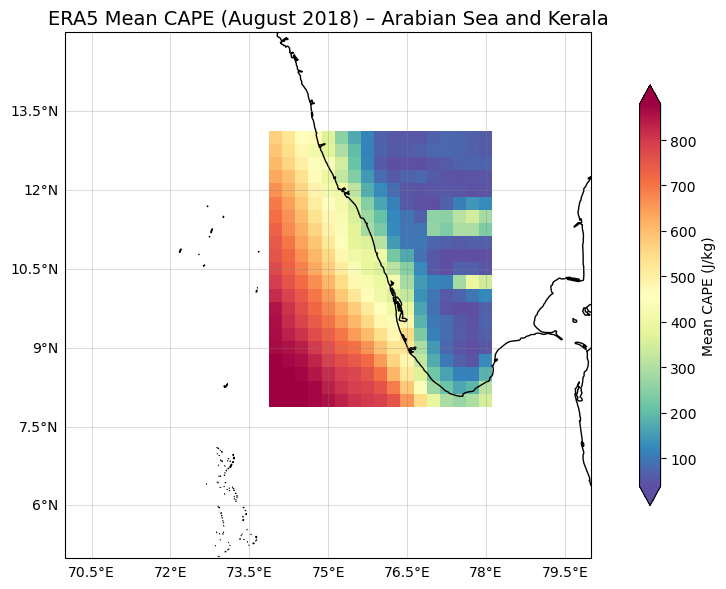

In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_data_single_levels_CAPE.nc")

# Mean CAPE
cape_mean = ds['cape'].mean(dim='valid_time')

# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot CAPE with a smooth and diverging colormap
cape_mean.plot(
    ax=ax,
    cmap='Spectral_r',  # Diverging scheme like in IPCC figures
    cbar_kwargs={'label': 'Mean CAPE (J/kg)', 'shrink': 0.8},
    transform=ccrs.PlateCarree(),
    robust=True,  # avoids outliers distorting color scale
    shading='auto'  # prevents gridblock look
)

# Add detailed coastlines and national borders
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

# Zoom out for ocean context
ax.set_extent([70, 80, 5, 15], crs=ccrs.PlateCarree())

# Title
ax.set_title("ERA5 Mean CAPE (August 2018) – Arabian Sea and Kerala", fontsize=14)

plt.tight_layout()
plt.show()


Detected variable: w


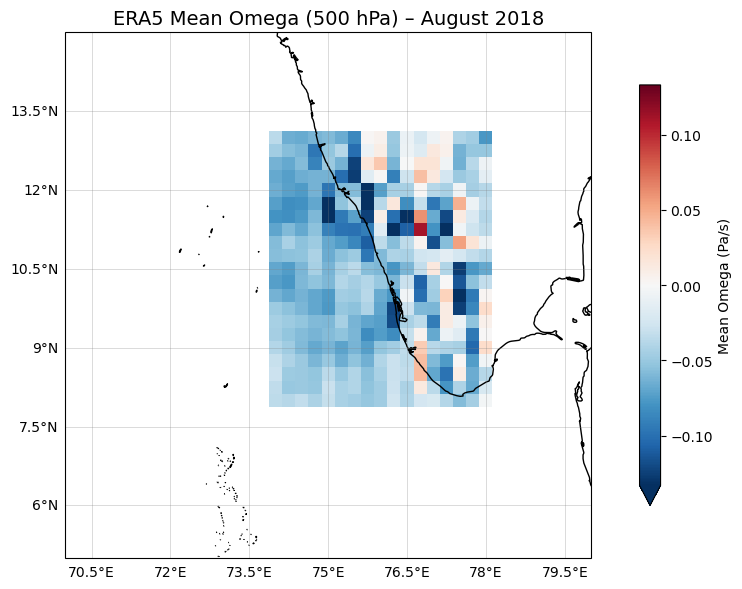

In [3]:
#to analyse vertical omega
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_on_pressure_levels.nc")

# Detect variable name
var_name = [v for v in ds.data_vars if 'omega' in v or 'w' in v or 'vertical_velocity' in v][0]
print(f"Detected variable: {var_name}")

# Select omega at 500 hPa
omega_500 = ds[var_name].sel(pressure_level=500)

# Take temporal mean
omega_mean = omega_500.mean(dim='valid_time')

# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

omega_mean.plot(
    ax=ax,
    cmap='RdBu_r',
    cbar_kwargs={'label': 'Mean Omega (Pa/s)', 'shrink': 0.8},
    transform=ccrs.PlateCarree(),
    robust=True,
    shading='auto'
)

# Map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

# Set extent to Kerala + Arabian Sea
ax.set_extent([70, 80, 5, 15], crs=ccrs.PlateCarree())

# Title
ax.set_title("ERA5 Mean Omega (500 hPa) – August 2018", fontsize=14)

plt.tight_layout()
plt.show()


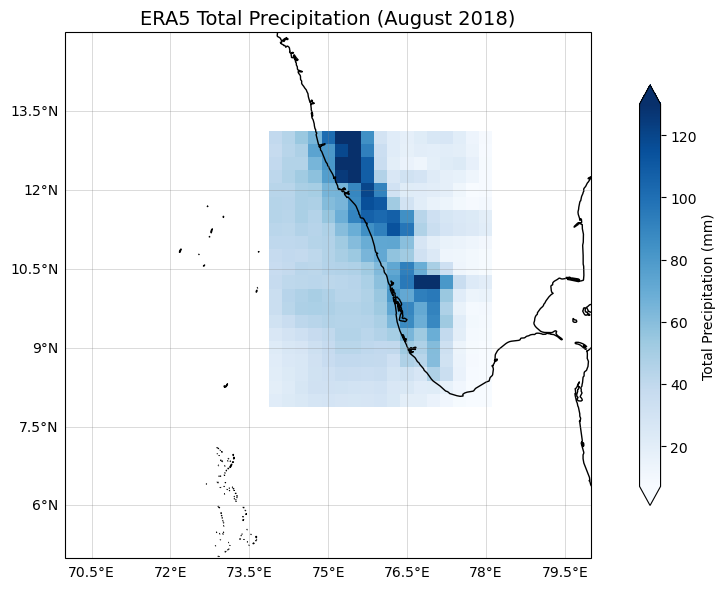

In [5]:
#to Plot Total Rainfall
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load total precipitation data
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_data_single_levels_TP.nc")

# Convert precipitation from meters to mm (ERA5 gives m)
precip_mm = ds['tp'].sum(dim='valid_time') * 1000  # mm/month

# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

precip_mm.plot(
    ax=ax,
    cmap='Blues',
    cbar_kwargs={'label': 'Total Precipitation (mm)', 'shrink': 0.8},
    transform=ccrs.PlateCarree(),
    robust=True,
    shading='auto'
)

ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False
ax.set_extent([70, 80, 5, 15], crs=ccrs.PlateCarree())

ax.set_title("ERA5 Total Precipitation (August 2018)", fontsize=14)
plt.tight_layout()
plt.show()


In [5]:
print(f"Max total precip in August 2018: {precip_mm.max().values * 1:.2f} mm")


Max total precip in August 2018: 155.43 mm


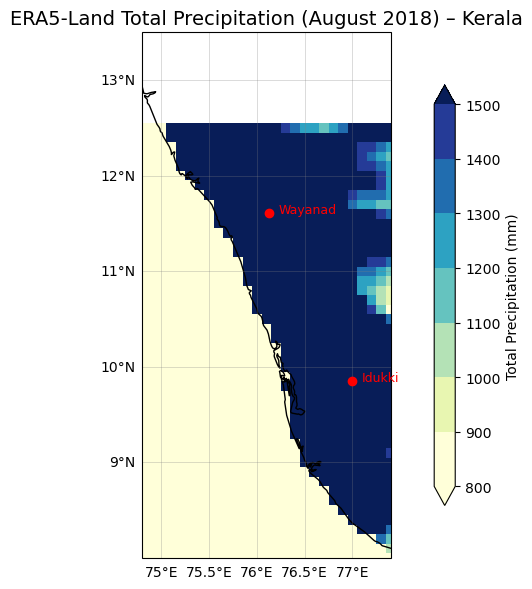

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Load dataset
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_Land_tp_Kerala_Aug2018.nc")
precip_mm = ds['tp'].sum(dim='valid_time') * 1000  # convert to mm

# Refined levels
levels = [800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
cmap = plt.cm.YlGnBu
norm = BoundaryNorm(levels, ncolors=cmap.N, extend='max')

# Plot
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

precip_mm.plot(
    ax=ax,
    cmap=cmap,
    norm=norm,
    levels=levels,
    cbar_kwargs={'label': 'Total Precipitation (mm)', 'shrink': 0.8},
    transform=ccrs.PlateCarree(),
    shading='auto'
)

# Map features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS.with_scale('10m'))

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

# Add markers for Idukki and Wayanad
ax.plot(77.0, 9.85, 'ro', transform=ccrs.PlateCarree())
ax.text(77.1, 9.85, 'Idukki', color='red', fontsize=9, transform=ccrs.PlateCarree())

ax.plot(76.13, 11.61, 'ro', transform=ccrs.PlateCarree())
ax.text(76.23, 11.61, 'Wayanad', color='red', fontsize=9, transform=ccrs.PlateCarree())

# Adjust map bounds
ax.set_extent([74.8, 77.4, 8, 13.5], crs=ccrs.PlateCarree())
ax.set_title("ERA5-Land Total Precipitation (August 2018) – Kerala", fontsize=14)

plt.tight_layout()
plt.show()



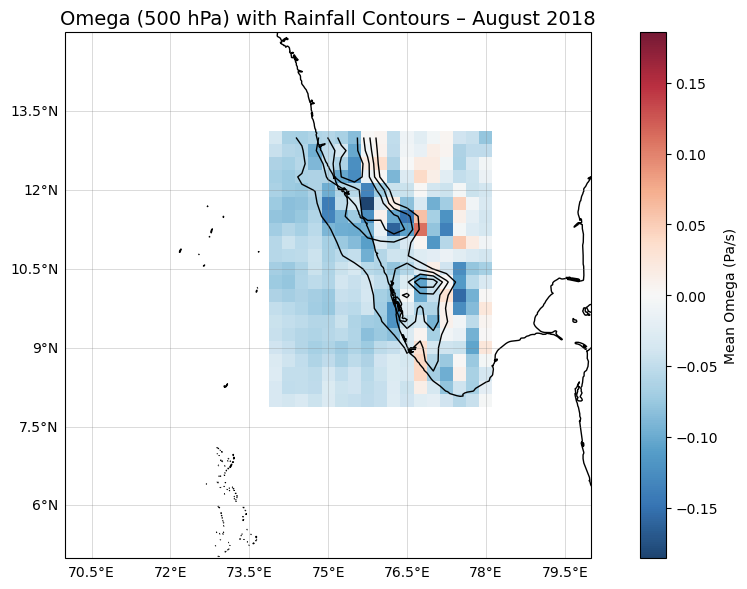

In [9]:
#to overlay rainfall over omega plot
omega_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_on_pressure_levels.nc")
rain_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_data_single_levels_TP.nc")

# Extract omega and rainfall
omega_500 = omega_ds['w'].sel(pressure_level=500).mean(dim='valid_time')
rain_mm = rain_ds['tp'].sum(dim='valid_time') * 1000  # convert to mm

# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Omega shading
omega_500.plot(
    ax=ax,
    cmap='RdBu_r',
    cbar_kwargs={'label': 'Mean Omega (Pa/s)'},
    transform=ccrs.PlateCarree(),
    shading='auto',
    alpha=0.9
)

# Rainfall contours
rain_mm.plot.contour(
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=[50, 75, 100, 125],
    colors='black',
    linewidths=1.0
)

# Map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax.set_extent([70, 80, 5, 15], crs=ccrs.PlateCarree())
ax.set_title("Omega (500 hPa) with Rainfall Contours – August 2018", fontsize=14)
plt.tight_layout()
plt.show()


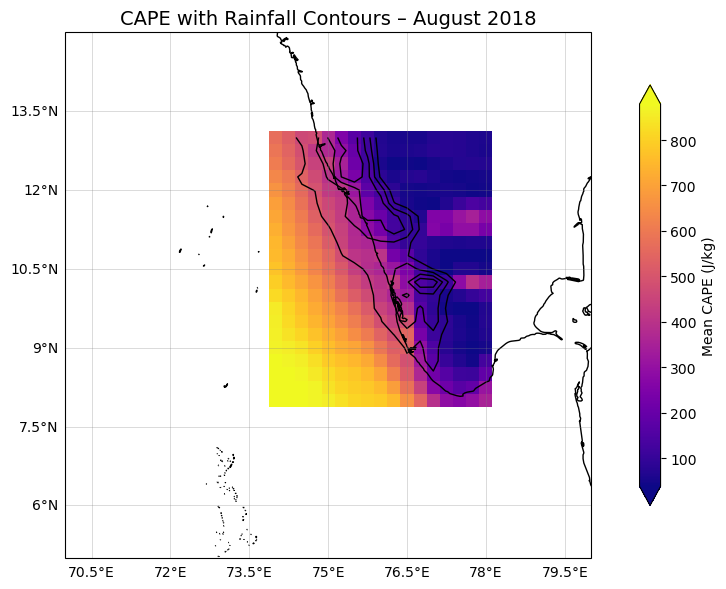

In [13]:
#CAPE over rainfall
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load CAPE and rainfall datasets
cape_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_data_single_levels_CAPE.nc")
rain_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_data_single_levels_TP.nc")

# Process data
cape_mean = cape_ds['cape'].mean(dim='valid_time')  # J/kg
rain_mm = rain_ds['tp'].sum(dim='valid_time') * 1000  # mm

# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Background: CAPE
cape_mean.plot(
    ax=ax,
    cmap='plasma',
    cbar_kwargs={'label': 'Mean CAPE (J/kg)', 'shrink': 0.8},
    transform=ccrs.PlateCarree(),
    robust=True,
    shading='auto'
)

# Overlay: rainfall contours
rain_mm.plot.contour(
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=[50, 75, 100, 125],
    colors='black',
    linewidths=1
)

# Map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

# Extent for Kerala + Arabian Sea
ax.set_extent([70, 80, 5, 15], crs=ccrs.PlateCarree())

# Title
ax.set_title("CAPE with Rainfall Contours – August 2018", fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\SANGETHA\anaconda3\Lib\site-packages\numpy\core\_asarray.py:126: RuntimeWarning: invalid value encountered in cast
  arr = array(a, dtype=dtype, order=order, copy=False, subok=subok)


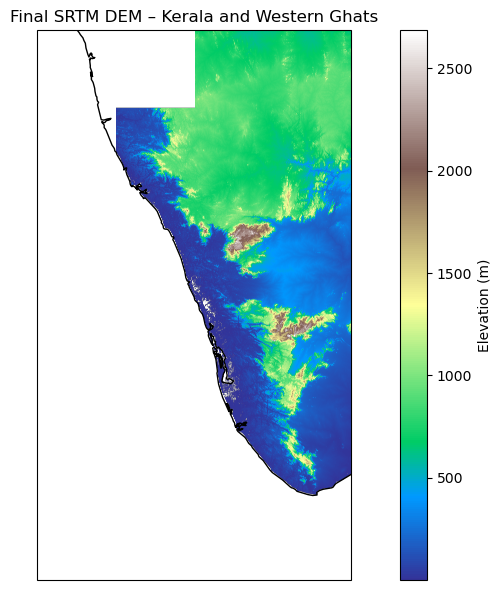

In [7]:
import rasterio
from rasterio.merge import merge
import rasterio.io
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 📁 Your DEM tile folder
dem_folder = r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\DEM"
tif_files = glob.glob(os.path.join(dem_folder, "*.tif"))

# ✅ Process all tiles and mask bad elevation values
src_files_to_mosaic = []
for fp in tif_files:
    with rasterio.open(fp) as src:
        data = src.read(1)
        profile = src.profile
        if np.min(data) <= -32767:
            data = np.where(data <= -32767, np.nan, data)  # mask nodata
            memfile = rasterio.io.MemoryFile()
            with memfile.open(**profile) as mem_dst:
                mem_dst.write(data, 1)
            src_files_to_mosaic.append(memfile.open())
        else:
            src_files_to_mosaic.append(rasterio.open(fp))

# 🔄 Merge the cleaned DEM tiles
mosaic, out_trans = merge(src_files_to_mosaic)

# 🎨 Mask sea and flat regions ≤ 0
dem_data_masked = np.where(mosaic[0] <= 0, np.nan, mosaic[0])

# 🗺️ Plotting the final topography
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

img = ax.imshow(
    dem_data_masked,
    extent=(out_trans[2], out_trans[2] + mosaic.shape[2]*out_trans[0],
            out_trans[5] + mosaic.shape[1]*out_trans[4], out_trans[5]),
    cmap='terrain',
    transform=ccrs.PlateCarree()
)

plt.colorbar(img, ax=ax, label="Elevation (m)")
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)
ax.set_title("Final SRTM DEM – Kerala and Western Ghats")
ax.set_extent([74, 78, 7, 14], crs=ccrs.PlateCarree())

plt.tight_layout()
plt.show()


In [11]:
# Show bounding box of your merged DEM
xmin = out_trans[2]
xmax = out_trans[2] + mosaic.shape[2] * out_trans[0]
ymax = out_trans[5]
ymin = out_trans[5] + mosaic.shape[1] * out_trans[4]

print(f"DEM Bounding Box:")
print(f"Longitude: {xmin:.2f}°E to {xmax:.2f}°E")
print(f"Latitude:  {ymin:.2f}°N to {ymax:.2f}°N")


DEM Bounding Box:
Longitude: 75.00°E to 78.00°E
Latitude:  8.00°N to 14.00°N


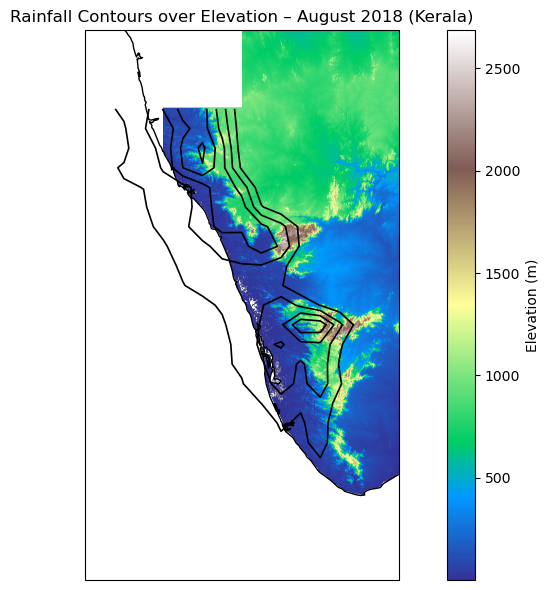

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load ERA5 total precipitation (single level, hourly)
rain_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\ERA5_hourly_data_single_levels_TP.nc")

# Sum over time and convert to mm
rain_mm = rain_ds['tp'].sum(dim='valid_time') * 1000  # from meters to mm

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Background: DEM (already merged and masked earlier)
img = ax.imshow(
    dem_data_masked,
    extent=(out_trans[2], out_trans[2] + mosaic.shape[2] * out_trans[0],
            out_trans[5] + mosaic.shape[1] * out_trans[4], out_trans[5]),
    cmap='terrain',
    transform=ccrs.PlateCarree()
)
plt.colorbar(img, ax=ax, label="Elevation (m)")

# Overlay: Rainfall contours
rain_mm.plot.contour(
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=[50, 75, 100, 125, 150],  # adjust based on your data
    colors='black',
    linewidths=1.2
)

# Map decorations
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)
ax.set_title("Rainfall Contours over Elevation – August 2018 (Kerala)")
ax.set_extent([74, 78, 7, 14], crs=ccrs.PlateCarree())

plt.tight_layout()
plt.show()


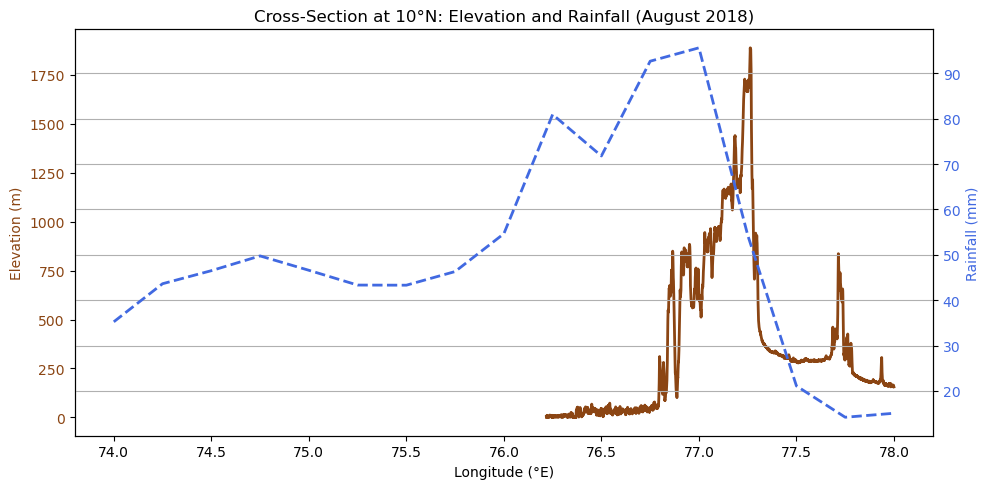

In [16]:
import numpy as np

# Step 1: Define latitude for cross-section (e.g., 10°N)
cross_lat = 10.0

# Step 2: Extract rainfall slice at that latitude
rain_slice = rain_mm.sel(latitude=cross_lat, method="nearest")

# Get lon and rain values
rain_lons = rain_slice.longitude.values
rain_vals = rain_slice.values

# Step 3: Extract elevation slice from DEM
# We'll align DEM lat/lon with rainfall for best comparison

# Create longitude array from DEM
dem_lon_start = out_trans[2]
dem_lon_res = out_trans[0]
dem_lon_count = mosaic.shape[2]
dem_lons = np.array([dem_lon_start + i * dem_lon_res for i in range(dem_lon_count)])

# Create latitude array from DEM
dem_lat_start = out_trans[5]
dem_lat_res = out_trans[4]  # Should be negative
dem_lat_count = mosaic.shape[1]
dem_lats = np.array([dem_lat_start + i * dem_lat_res for i in range(dem_lat_count)])

# Find closest lat index to 10°N
lat_index = np.abs(dem_lats - cross_lat).argmin()
elev_vals = dem_data_masked[lat_index, :]

# Clip DEM lons to rainfall range
valid = (dem_lons >= rain_lons.min()) & (dem_lons <= rain_lons.max())
elev_vals = elev_vals[valid]
elev_lons = dem_lons[valid]

# Step 4: Plot both on the same graph
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# Elevation
ax1.plot(elev_lons, elev_vals, color='saddlebrown', label='Elevation (m)', linewidth=2)
ax1.set_ylabel("Elevation (m)", color='saddlebrown')
ax1.set_xlabel("Longitude (°E)")
ax1.tick_params(axis='y', labelcolor='saddlebrown')

# Rainfall (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(rain_lons, rain_vals, color='royalblue', label='Rainfall (mm)', linewidth=2, linestyle='--')
ax2.set_ylabel("Rainfall (mm)", color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

plt.title("Cross-Section at 10°N: Elevation and Rainfall (August 2018)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\total_precip_aug1940_2024.nc")

# Check structure (e.g., 'tp', 'precip', 'precipitation')
print(ds)


<xarray.Dataset> Size: 67kB
Dimensions:     (valid_time: 46, latitude: 21, longitude: 17)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 368B 1979-08-01T06:00:00 ... 2024...
  * latitude    (latitude) float64 168B 12.5 12.25 12.0 11.75 ... 8.0 7.75 7.5
  * longitude   (longitude) float64 136B 74.0 74.25 74.5 ... 77.5 77.75 78.0
    expver      (valid_time) <U4 736B ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 66kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-02T19:17 GRIB to CDM+CF via cfgrib-0.9.1...


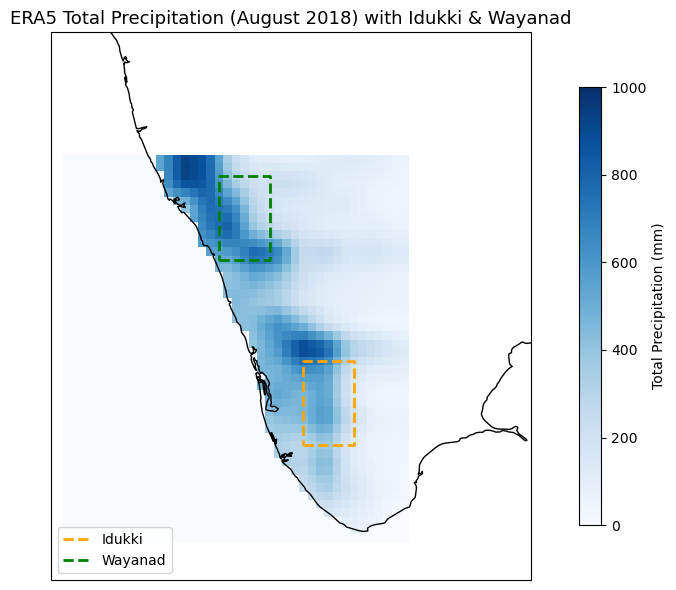

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load dataset
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_Land_tp_Kerala_Aug2018.nc")

# De-accumulate hourly data and convert to mm
tp = ds['tp'].diff(dim='valid_time') * 1000  # mm
tp = tp.where(tp >= 0, 0)  # remove negative values after diff (initial NaN or rollover)

# Sum over entire August period
tp_august = tp.sum(dim='valid_time')

# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

im = tp_august.plot(
    ax=ax,
    cmap='Blues',
    vmin=0,
    vmax=1000,
    cbar_kwargs={'label': 'Total Precipitation (mm)', 'shrink': 0.8},
    transform=ccrs.PlateCarree(),
    shading='auto'
)

# Coastlines and borders
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)

# Set zoomed extent
ax.set_extent([73.5, 78.5, 7.8, 13.5], crs=ccrs.PlateCarree())

# Add district boxes
ax.plot([76.8, 77.4, 77.4, 76.8, 76.8], [9.1, 9.1, 10.1, 10.1, 9.1],
        color='orange', linestyle='--', linewidth=2, transform=ccrs.PlateCarree(), label='Idukki')
ax.plot([75.8, 76.4, 76.4, 75.8, 75.8], [11.3, 11.3, 12.3, 12.3, 11.3],
        color='green', linestyle='--', linewidth=2, transform=ccrs.PlateCarree(), label='Wayanad')

# Legend and extent
ax.legend(loc='lower left')
ax.set_extent([73.8, 79.5, 7.5, 14], crs=ccrs.PlateCarree())
ax.set_title("ERA5 Total Precipitation (August 2018) with Idukki & Wayanad", fontsize=13)
plt.tight_layout()
plt.show()


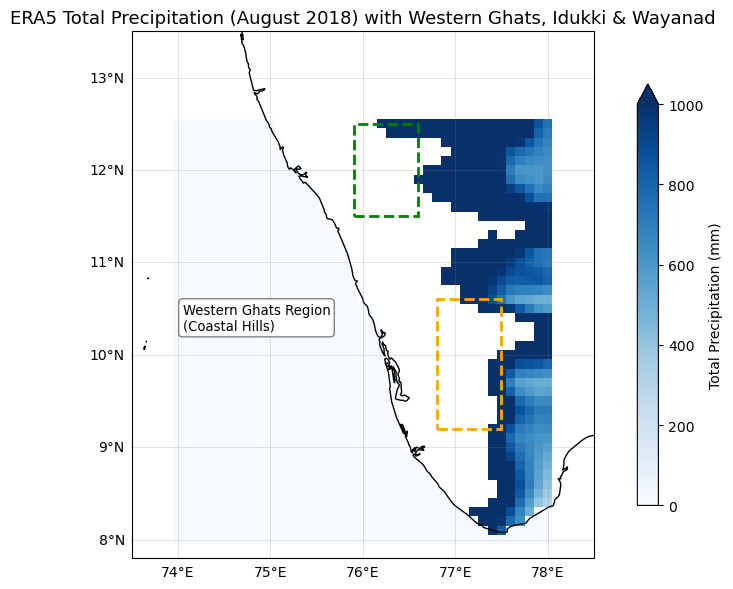

In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Load ERA5-Land precipitation
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_Land_tp_Kerala_Aug2018.nc")
tp = ds['tp'].sum(dim='valid_time') * 1000  # meters to mm
tp = tp.where(tp < 2000)  # filter extreme values

# Create figure
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot rainfall
img = tp.plot.pcolormesh(
    ax=ax,
    cmap='Blues',
    transform=ccrs.PlateCarree(),
    vmin=0,
    vmax=1000,
    cbar_kwargs={'label': 'Total Precipitation (mm)', 'shrink': 0.8}
)

# Add coastlines and borders
ax.coastlines('10m')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.4)
gl.right_labels = False
gl.top_labels = False

# Add district boxes
idukki_box = mpatches.Rectangle((76.8, 9.2), 0.7, 1.4, fill=False, edgecolor='orange', linestyle='--', linewidth=2)
wayanad_box = mpatches.Rectangle((75.9, 11.5), 0.7, 1.0, fill=False, edgecolor='green', linestyle='--', linewidth=2)
ax.add_patch(idukki_box)
ax.add_patch(wayanad_box)

# Annotate Western Ghats Region label on the left side horizontally
ax.text(74.05, 10.4, 'Western Ghats Region\n(Coastal Hills)', color='black',
        fontsize=9.5, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'),
        ha='left', va='center')


# Set zoomed extent
ax.set_extent([73.5, 78.5, 7.8, 13.5], crs=ccrs.PlateCarree())

# Title
ax.set_title("ERA5 Total Precipitation (August 2018) with Western Ghats, Idukki & Wayanad", fontsize=13)

plt.tight_layout()
plt.show()
